# **Web Scraping: Extrayendo datos de Internet**

## **¿Qué es el web scraping?**  🤔

*La práctica de **recopilar datos** a través de cualquier medio que no sea un programa que interactúa con una API o un humano que usa un navegador web. **Normalmente mediante un programa automatizado** que consulta un servidor web, solicita datos (generalmente en forma de HTML y otros archivos que componen las páginas web) y luego analiza esos datos para extraer la información necesaria.*

*Por otro lado, el **web crawling o indexación** se utiliza para indexar la información de la página mediante bots también conocidos como crawlers (lo que hacen los motores de búsqueda). Se trata de ver una página como un todo e indexarla. Cuando un bot rastrea un sitio web, **recorre todas las páginas y todos los enlaces**, hasta la última línea del sitio web, en busca de **CUALQUIER información**.*

## **Antes de empezar** ⚠️

1. *Aspectos éticos y legales del web scraping*
  * El web scraping es una forma automática de guardar información que se presenta en nuestro navegador muy utilizada tanto en la industria como en la educación, sus aspectos legales dependerán de cada sitio y de cada estado. Respecto a la ética es importante que nos detengamos a pensar si estamos o no generando algún perjuicio.

2. *No reinventar la rueda*
  * Emprender un proyecto de web scraping a veces es rápido y sencillo, pero normalmente requiere tiempo y esfuerzo. Siempre es aconsejable asegurarse de que valga la pena y antes iniciar hacerse algunas preguntas:<br>
    - ¿La información que necesito ya se encuentra disponible en otro sitio? (ej: APIs)
    - ¿Vale la pena automatizarlo o es algo que lleva poco trabajo a mano?


## **Conceptos básicos sobre la web** 

#### HTML, CSS y JavaScript son los tres lenguajes principales con los que se hacen la mayoría de las páginas web que vemos (*front-end*).

<center>
<img src="https://www.nicepng.com/png/detail/142-1423886_html5-css3-js-html-css-javascript.png" width="400">

<img src="https://geekflare.com/wp-content/uploads/2019/12/css-gif.gif" width="243">


</center>

<br>
<br>

| ESTRUCTURA  | ESTILO | FUNCIONALIDAD|
|-----|----------------| ---------- |
|HTML| CSS | JAVASCRIPT|



## Introducción a HTML

El lenguaje principal de la internet es HTML, cuando nosotros vemos algo así:

![](https://github.com/institutohumai/cursos-python/blob/master/Scraping/1_HTTP_Inicial/multimedia/hello-world.jpeg?raw=1)

Eso se genera a partir de una código que luce así

```html
<html>
  <header>
    <title>Web Scraping</title>
  </header>
  <body>
    <h1>¡Hola!</h1>
    <p>Esto es un sitio web</p>
  </body>
</html>
```

**_Nota_**: Para saber más sobre HTML puedes consultar [aquí](https://www.w3schools.com/TAGS/default.ASP) la lista de etiquetas de este lenguaje.


```html
  <head>
    <title>Mi primer pagina</title>
  </head>
  <body>
    <h1 id='titulo'>Hola</h1>
    <h2 style='color:red;'>Subtitulo en rojo</h2>
    <p>Primer parrafo</p>
    <hr>
    <img src="https://static.grupojoly.com/clip/473ee5f7-207e-41ce-8119-e2dac22ddc1a_source-aspect-ratio_1600w_0.jpg" alt="perro" width=400>
  </body>
```
<center>
<h3>Probar el código: <a>https://codepen.io/Juan-Alejandro-Maniglia/pen/NWZMXGV</a></h3>
</center>


## DOM (Document Object Model)


**Interfaz independiente del lenguaje que trata un documento XML o HTML como una estructura de tipo árbol**

![Modelo DOM](https://upload.wikimedia.org/wikipedia/commons/5/5a/DOM-model.svg)

```html
<html>
  <head>
    <title>My title</title>
  </head>
  <body>
    <h1>A heading</h1>
    <a href>Link text</a>
  </body>
</html>
```
</figure>

<font color="gray"> Fuente: https://en.wikipedia.org/wiki/Document_Object_Model
</font>


## ¿Cómo consigo el código HTML?

Ahora que sabemos cuál es el componente principal de los sitios webs podemos intentar programar a nuestra computadora para leer HTML y extraer información útil.

Para conseguir el código de un sitio web podemos presionar `ctrl+u` en el navegador.

Para hacer lo mismo desde Python podemos hacer lo siguiente:

In [1]:
#Importamos la librería necesaria
import requests

un_sitio_web = "https://es.wikipedia.org/wiki/HTML"

# esto descarga la información del sitio web
# Es similar a lo que hace un navegador web antes de mostrar el contenido de forma amigable para un humano
resultado = requests.get(un_sitio_web)

# accedemos al código a través del atributo "text" del resultado
codigo_html = resultado.text
print(codigo_html[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>HTML - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpre

### ¿Qué acabamos de hacer?

Veamos algunos detalles más sobre cómo descargar el contenido de un sitio web (O cómo se le suele decir en data _realizar un request_). Python permite utilizar la función get de la librería requests para hacer esto, veamos con mayor profundidad cómo se utiliza.

In [2]:
# httpbin es una pagina para testear pedidos HTTP, en particular la siguiente URL nos devuelve nuestro header.
url = 'http://httpbin.org/headers' 
resp = requests.get(url)

print('------------------------------')
print('Respuesta sin headers')
print(resp.text)

print('------------------------------')
print('Respuesta con headers')
nuestros_headers = {
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'
    }
resp_con_headers = requests.get(url, headers = nuestros_headers)
print(resp_con_headers.text)


------------------------------
Respuesta sin headers
{
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-67816404-4779db035c013808090ab2d4"
  }
}

------------------------------
Respuesta con headers
{
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36", 
    "X-Amzn-Trace-Id": "Root=1-67816404-3eeaee9227ad2e8303a3eab0"
  }
}



A parte de la _url_, muchas veces se especifican los _headers_, estos son objetos que proveen datos sobre nuestro _request_, por ejemplo en el campo user-agent brindamos detalles sobre quienes somos (Nuestro sistema operativo, navegador web y demás). En este caso, como no estamos usando un navegador sino que hacemos el _request_ desde Python normalmente se omite este campo, o en caso de ser obligatorio se puede inventar, ya que algunos sitios nos van a ignorar a menos que especifiquemos este campo.

Pueden ver más en esta [Lista de Headers](https://es.wikipedia.org/wiki/Anexo:Cabeceras_HTTP)

- Consultas
    - ¿Por qué los sitios te podrían bloquear/ignorar?
    - ¿De donde saco un user-agent?


### Protocolo HTTP

La web utiliza ampliamente el protocolo HTTP (de _Hypertext Transfer Protocol_) para interactuar con sus recursos. Este protocolo indica cómo estructurar un mensaje de texto que describa la petición (**request**) del usuario a un servidor. Hay distintos tipos de peticios que un usuario puede realizar, algunas de ellas son:

* **GET**: Solicita una representación de un recurso alojado en el servidor.
* **POST**: Envía datos al servidor para crear un recurso nuevo.
* **PUT**: Crea o modifica un recurso del servidor.
* **DELETE**: Elimina un recurso del servidor.

Existen otros métodos que no nos van a ser relevantes por ahora.

Cada vez que vamos al navegador y escribimos la dirección de una página web, **estamos haciendo un GET request** a un servidor. 
Esto es una petición para adquirir el código de un recurso que queremos visualizar en el navegador. 

Como vimos antes la función `get` retorna un objeto, el cual llamamos _resp_, este es un elemento de la clase **_Response_** y tiene distintos atributos a los que podemos acceder.

El objeto **_Response_** de requests tiene los siguientes elementos principales:

- **.text**: devuelve el contenido como string.
- **.content**: devuelve el contenido en bytes.
- **.json()**: el contenido en formato JSON, si es posible.
- **.status_code**: el código de respuesta.
- **.ok**: True si es exitosa la consulta.


El código de status (*status code*) nos informa del estado de nuestra *request*

Códigos posibles:

- 1xx Mensaje de información
- 2xx Éxito
- 3xx Redirigir a otra URL
- 4xx Error del cliente
- 5xx Error del servidor

<center>
<img alt="http-status-codes" src="https://miro.medium.com/max/1400/1*w_iicbG7L3xEQTArjHUS6g.jpeg" width="500"> <br>
</font>
</center>



In [3]:
#Vemos el código de estado
# 200 es que esta todo bien, 5xx o 4xx es que esta todo mal (Por ejemplo el clásico 404)
resp.status_code

200

In [4]:
#Vemos los headers que enviamos
resp.request.headers

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

El atributo que nos interesa particularmente es resp.text, que guardan el contenido de la página.

Como vamos a descargar el codigo de un sitio frecuentemente armamos una funcion para no reescribir lo mismo muchas veces

In [6]:
def codigo_html(url:str) -> str:
    headers = {
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'
        }
    resp = requests.get(url, headers = headers)
    return resp.text

In [7]:
# También podemos scrapear otro tipo que no sea texto

# URL
image_url = 'https://img2.rtve.es/i/?w=1600&i=1657019154219.jpg'

# Petición
image_response = requests.get(image_url)

# Contenido de la imagen en bytes
image_response_content = image_response.content

print(f'Este es el contenido en bytes: \n {image_response_content[:100]}')

Este es el contenido en bytes: 
 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 80\n\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08'


Esta imagen la bajamos de internet usando Python! 
 


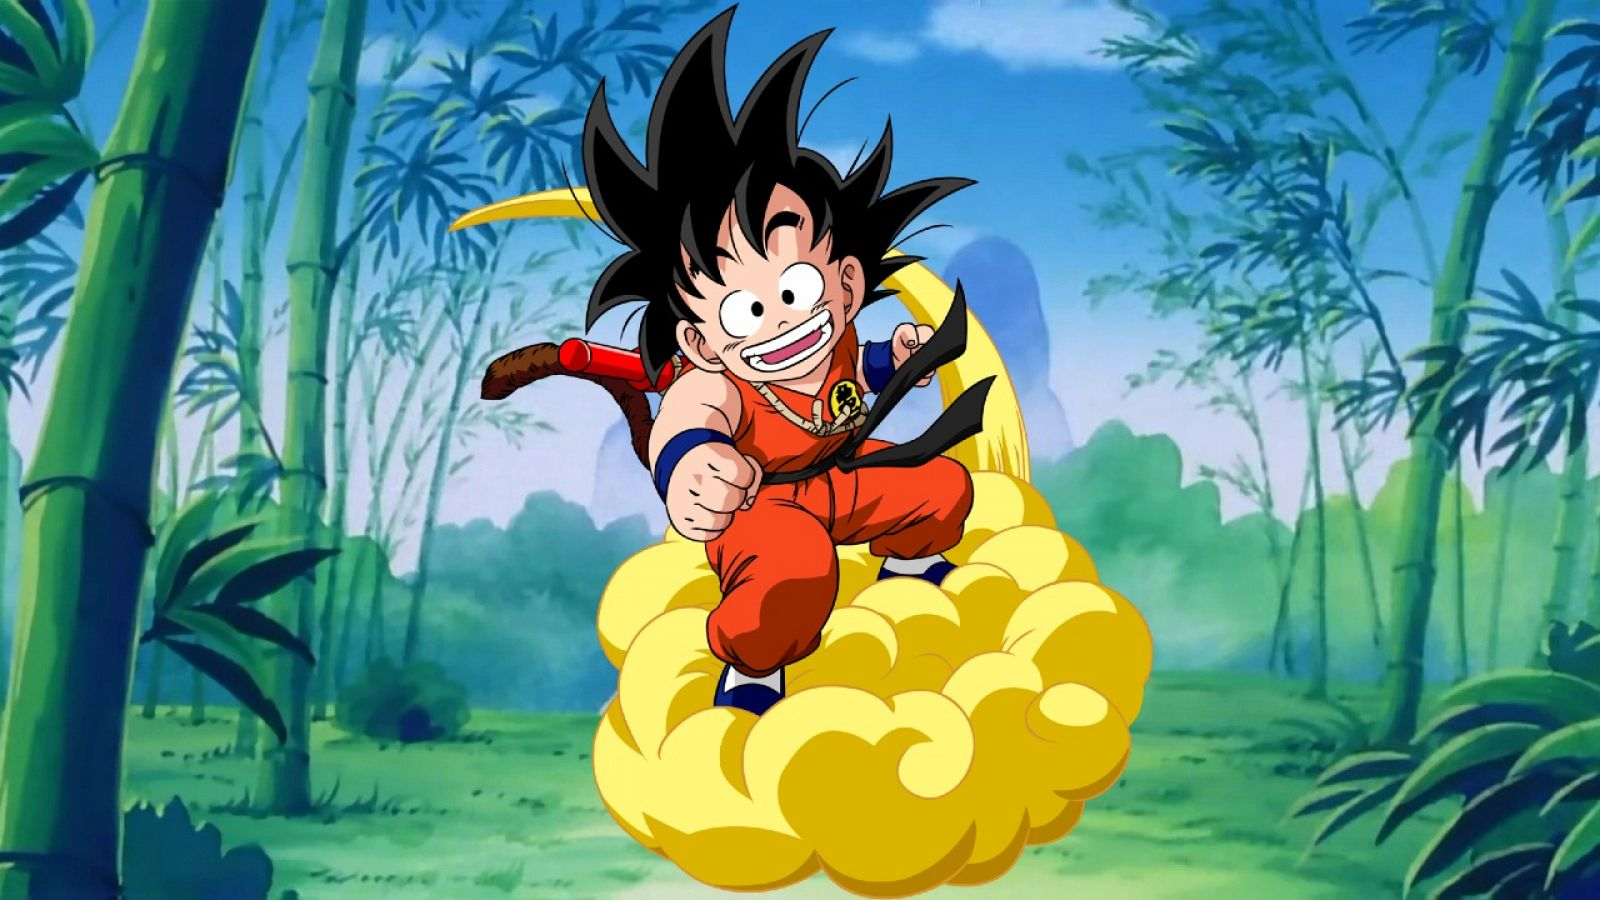

In [8]:
# Importamos librerías
from PIL import Image
from io import BytesIO

# Mostramos la imagen
image_from_url = Image.open(BytesIO(image_response_content))
print('Esta imagen la bajamos de internet usando Python! \n ')
image_from_url

### Documentación
La función get y la clase Response fueron desarrolladas por lxs programadores que crearon la librería requests. Si quieren saber mas sobre algún detalle siempre es recomendable buscar en la [documentación oficial de la librería](https://docs.python-requests.org/en/latest/).

## ¿Cómo extraigo datos útiles del código HTML?

- Veamos un ejemplo inspeccionando con chrome un sitio web:
1. Nos posicionamos sobre el elemento que nos interesa.
2. Presionamos click derecho -> *inspeccionar elemento* para abrir las *herramientas de desarrollo* (o presionando `CTRL + SHIFT + I`)
4. Esto nos da acceso al codigo de HTML correspondiente al elemento de la pagina que nos interesa.


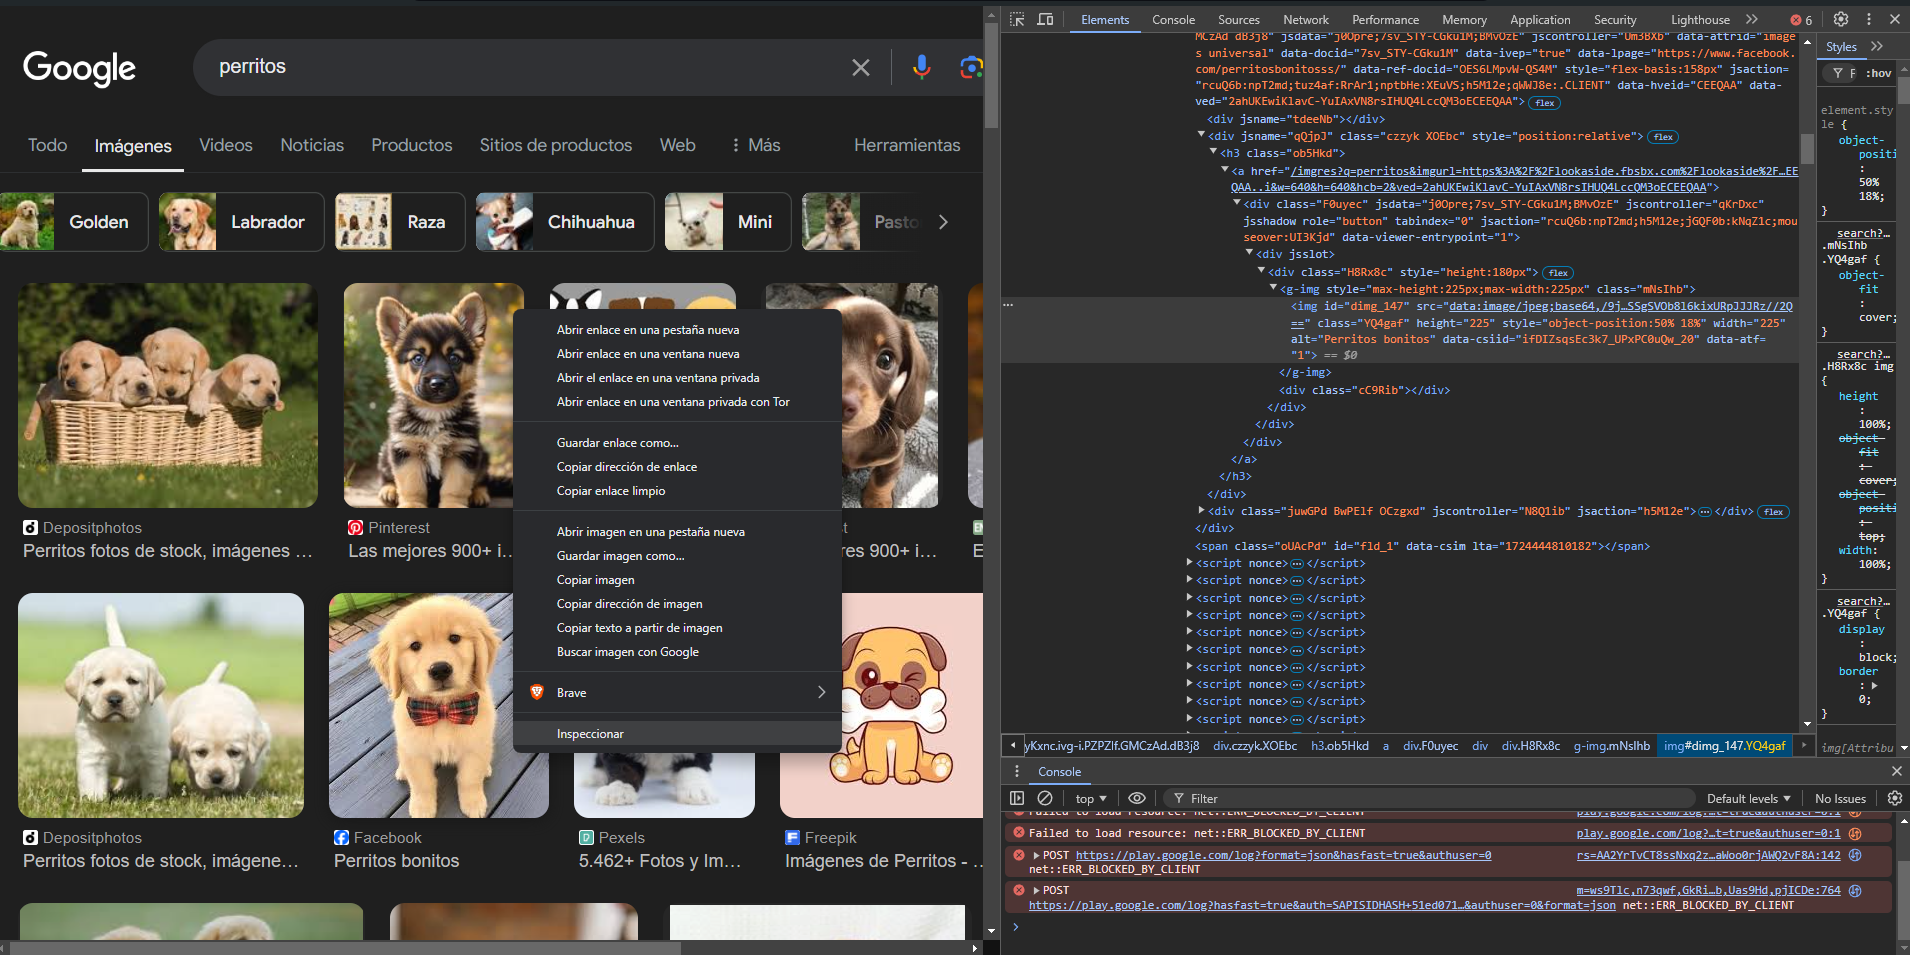

<hr>

### **Método 1: Expresiones regulares**

RegEx para los amigos. Es un mini lenguaje de programación diseñado para realizar búsquedas en strings.

Las funciones principales de la librería re son:
- re.findall(pattern, string) para encontrar todos los resultados de una búsqueda
- re.search(pattern, string) para encontrar el primer resultado que coincida
- re.sub(pattern, replace, string) para substituir un texto por otro

#### Aplicandolo a la web
##### Ejemplo 1: Usamos regex para extraer los títulos myanimelist.net

In [10]:
#Usamos el navegador para identificar la estructura de los datos que queremos extraer y creamos el patrón de búsqueda
regla_de_busqueda = r'class="hoverinfo_trigger.*?>([^<]+)</a>'

In [11]:
#Usamos findall para encontrar todas las coincidencias
import re
titles = re.findall(regla_de_busqueda, codigo_html("https://myanimelist.net/topanime.php"))

In [12]:
titles

['Sousou no Frieren',
 'Fullmetal Alchemist: Brotherhood',
 'One Piece Fan Letter',
 'Steins;Gate',
 'Shingeki no Kyojin Season 3 Part 2',
 'Gintama°',
 'Gintama: The Final',
 'Gintama&#039;',
 'Hunter x Hunter (2011)',
 'Gintama&#039;: Enchousen',
 'Ginga Eiyuu Densetsu',
 'Bleach: Sennen Kessen-hen',
 'Kaguya-sama wa Kokurasetai: Ultra Romantic',
 'Gintama.',
 'Fruits Basket: The Final',
 'Clannad: After Story',
 'Gintama',
 'Koe no Katachi',
 '3-gatsu no Lion 2nd Season',
 'Code Geass: Hangyaku no Lelouch R2',
 'Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare',
 'Gintama. Shirogane no Tamashii-hen - Kouhan-sen',
 'Kusuriya no Hitorigoto',
 'Monster',
 'Owarimonogatari 2nd Season',
 'Shingeki no Kyojin: The Final Season - Kanketsu-hen',
 'Violet Evergarden Movie',
 'Kimi no Na wa.',
 'Kingdom 3rd Season',
 'Ore dake Level Up na Ken Season 2: Arise from the Shadow',
 'Vinland Saga Season 2',
 'Gintama. Shirogane no Tamashii-hen',
 'Mob Psycho 100 II',
 'Kizumonogatari III: Reike

### **Método 2: BeautifulSoup**
* Esta librería provee un *parser* de html, o sea un programa que entiende el código, permitiendonos hacer consultas más sofisticadas de forma simple, por ejemplo "buscame todos los titulos h2 del sitio".


* Se usa para extraer los datos de archivos HTML. Crea un árbol de análisis a partir del código fuente de la página que se puede utilizar para extraer datos de forma jerárquica y más legible.

<center>
<img alt="" width="700" role="presentation" src="https://miro.medium.com/max/700/0*ETFzXPCNHkPpqNv_.png"> <br>

</center>

## Generalidades

In [ ]:
from bs4 import BeautifulSoup
import requests

# URL de la página que queremos scrapear
url_base = 'https://myanimelist.net/topmanga.php'

# Realizamos la solicitud GET para obtener el contenido de la página
html_obtenido = requests.get(url_base)
soup = BeautifulSoup(html_obtenido.text, "html.parser")

soup

In [15]:
# Ahora vamos a buscar todos los elementos que contienen los títulos de los mangas
# Sabemos que los títulos están dentro de <a> con clase "hoverinfo_trigger"

titulos = soup.find_all('a', class_='hoverinfo_trigger')

titulos

[<a class="hoverinfo_trigger fl-l ml12 mr8" href="https://myanimelist.net/manga/2/Berserk" id="#area2" rel="#info2">
 <img alt="Manga: Berserk" border="0" class="lazyload" data-src="https://cdn.myanimelist.net/r/50x70/images/manga/1/157897.jpg?s=f03b5f8bfeb0b0962b7d5e7cb9a8d0d3" data-srcset="https://cdn.myanimelist.net/r/50x70/images/manga/1/157897.jpg?s=f03b5f8bfeb0b0962b7d5e7cb9a8d0d3 1x, https://cdn.myanimelist.net/r/100x140/images/manga/1/157897.jpg?s=89f4db27210a934c566d75a6163c5530 2x" height="70" width="50">
 </img></a>,
 <a class="hoverinfo_trigger fs14 fw-b" href="https://myanimelist.net/manga/2/Berserk" id="#area2" rel="#info2">Berserk</a>,
 <a class="hoverinfo_trigger fl-l ml12 mr8" href="https://myanimelist.net/manga/1706/JoJo_no_Kimyou_na_Bouken_Part_7__Steel_Ball_Run" id="#area1706" rel="#info1706">
 <img alt="Manga: JoJo no Kimyou na Bouken Part 7: Steel Ball Run" border="0" class="lazyload" data-src="https://cdn.myanimelist.net/r/50x70/images/manga/3/179882.jpg?s=dac810

In [16]:
# Filtramos los títulos relevantes y los imprimimos
for titulo in titulos:
    if 'manga' in titulo['href']:  # Aseguramos que sea un enlace a un manga
        print(titulo.text.strip())


Berserk

JoJo no Kimyou na Bouken Part 7: Steel Ball Run

Vagabond

One Piece

Monster

Slam Dunk

Vinland Saga

Fullmetal Alchemist

Tian Guan Cifu

Grand Blue

Omniscient Reader's Viewpoint

Guimi Zhi Zhu

Kingdom

Oyasumi Punpun

Houseki no Kuni

Real

20th Century Boys

Ashita no Joe

Monogatari Series: First Season

Yotsuba to!

Monogatari Series: Second Season

Umineko no Naku Koro ni Chiru - Episode 8: Twilight of the Golden Witch

Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen

Mo Dao Zu Shi

Mikkakan no Koufuku

GTO

3-gatsu no Lion

Haikyuu!!

Koe no Katachi

Tian Guan Cifu

Monogatari Series: Final Season

Akatsuki no Yona

Mushoku Tensei: Isekai Ittara Honki Dasu

Sousou no Frieren

Ookami to Koushinryou

86

Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e

Kaze no Tani no Nausicaä

Nana

Kokou no Hito

Re:Zero kara Hajimeru Isekai Seikatsu

Kaoru Hana wa Rin to Saku

Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e: 2-nensei-hen

Honzuki no Gekokujou: Shisho ni

In [17]:
manga_containers = soup.find_all('tr', class_='ranking-list')

scores = []

# Extraemos el score para cada manga
for container in manga_containers:

    # Extraemos el puntaje del manga
    score_element = container.find('td', class_='score').text.strip()
    scores.append(score_element)

scores

['9.47',
 '9.32',
 '9.26',
 '9.22',
 '9.16',
 '9.08',
 '9.08',
 '9.04',
 '9.04',
 '9.03',
 '9.02',
 '9.01',
 '9.01',
 '9.00',
 '8.97',
 '8.95',
 '8.94',
 '8.93',
 '8.91',
 '8.90',
 '8.90',
 '8.90',
 '8.90',
 '8.90',
 '8.87',
 '8.87',
 '8.86',
 '8.86',
 '8.85',
 '8.85',
 '8.83',
 '8.82',
 '8.82',
 '8.82',
 '8.82',
 '8.82',
 '8.81',
 '8.81',
 '8.80',
 '8.80',
 '8.80',
 '8.79',
 '8.78',
 '8.78',
 '8.77',
 '8.77',
 '8.75',
 '8.75',
 '8.75',
 '8.74']

In [ ]:
import pandas as pd

# URL de la página que queremos scrapear
url_base = 'https://myanimelist.net/topmanga.php'

# Realizamos la solicitud GET para obtener el contenido de la página
html_obtenido = requests.get(url_base)
soup = BeautifulSoup(html_obtenido.text, "html.parser")

# Inicializamos listas para los títulos y puntajes
titulos = []
scores = []

# Buscamos todos los contenedores de mangas en la página
manga_containers = soup.find_all('tr', class_='ranking-list')

for container in manga_containers:
    # Extraemos el título del manga
    titulo_element = container.find('h3', class_='manga_h3')
    if titulo_element:
        titulos.append(titulo_element.text.strip())

    # Extraemos el puntaje del manga
    score_element = container.find('td', class_='score ac fs14')
    if score_element:
        scores.append(score_element.text.strip())

# Creamos un DataFrame con los resultados
df = pd.DataFrame({
    'Titulo': titulos,
    'Score': scores
})

df


<font color='red'>Ejercicio</font>

Anexar la url de cada uno de los mangas

**¡A trabajar!**

<img src="https://img.icons8.com/ios/452/spade.png" width="80" height="auto"/>


In [28]:
manga_containers = soup.find_all('a', class_='hoverinfo_trigger fl-l ml12 mr8')

for i in manga_containers:
    print(i['href'])
    breaK


url = []

# Extraemos el score para cada manga
for container in manga_containers:

    # Extraemos la url del manga
    url_element = container.find('a', class_='mhoverinfo_trigger fl-l ml12 mr8')
    url.append(url_element['href'])

url

https://myanimelist.net/manga/2/Berserk


TypeError: 'NoneType' object is not subscriptable

## Usando cookies 🍪

Las [*cookies*](https://es.wikipedia.org/wiki/Cookie_(inform%C3%A1tica)) son bloques de datos creados por un servidor con información enviada por un sitio web y almacenada en el navegador del usuario, de manera que el sitio web puede consultar la actividad previa del navegador. 

Sus principales funciones son:

* Recordar accesos para saber si ya se ha visitado la página (ejemplo: cuando nos *loggeamos* se guardan cookies).

* Conocer información sobre los hábitos de navegación.

También hay otro tipo de información que se guarda en algunas páginas que son las *sessions*, básicamente es un dato similar a una cookie pero que se guarda en el servidor en lugar de hacerlo en el cliente (nuestro navegador).

Para algunos proyectos de *web scraping* puede ser útil interactuar con ellas.

In [29]:
import requests
from IPython.display import HTML

response = requests.get('https://www.kaggle.com/')

# Obtenemos el atributo cookies
cookies = response.cookies
print(type(cookies))
print([cookies])

<class 'requests.cookies.RequestsCookieJar'>
[<RequestsCookieJar[Cookie(version=0, name='ka_sessionid', value='d4be35510a371594ac034fc91adb1e28', port=None, port_specified=False, domain='www.kaggle.com', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=1739165154, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='CSRF-TOKEN', value='CfDJ8EoW0iPxfH1Bld_X7qoPSR5YRHbUZ0S03Nh-0ocUzIlIDeCFe7bVreuE_RBtkTEZdhMbhCjWRrDF7ZjEjhLgcslbpJLo8B7LKpYYtL-H5Q', port=None, port_specified=False, domain='www.kaggle.com', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=True, expires=None, discard=True, comment=None, comment_url=None, rest={'samesite': 'strict', 'httponly': None}, rfc2109=False), Cookie(version=0, name='XSRF-TOKEN', value='CfDJ8EoW0iPxfH1Bld_X7qoPSR5ZBiQNLQCQjwWrqPOJXfGVT_KLz3oi0diQ5XQHFvyOrTz-DfSZ0qOMaUlwuJsXVHkpST64AweSNSJ6oP2AAc-3GA', port=None, port_

In [30]:
# iteramos sobre las cookies en el cookie jar
for cookie in cookies:
  print('domain: ' ,cookie.domain)
  print('name: ', cookie.name)
  print('value: ', cookie.value)
  print('------------------------')

domain:  www.kaggle.com
name:  ka_sessionid
value:  d4be35510a371594ac034fc91adb1e28
------------------------
domain:  www.kaggle.com
name:  CSRF-TOKEN
value:  CfDJ8EoW0iPxfH1Bld_X7qoPSR5YRHbUZ0S03Nh-0ocUzIlIDeCFe7bVreuE_RBtkTEZdhMbhCjWRrDF7ZjEjhLgcslbpJLo8B7LKpYYtL-H5Q
------------------------
domain:  www.kaggle.com
name:  XSRF-TOKEN
value:  CfDJ8EoW0iPxfH1Bld_X7qoPSR5ZBiQNLQCQjwWrqPOJXfGVT_KLz3oi0diQ5XQHFvyOrTz-DfSZ0qOMaUlwuJsXVHkpST64AweSNSJ6oP2AAc-3GA
------------------------
domain:  www.kaggle.com
name:  CLIENT-TOKEN
value:  eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOiIiLCJuYnQiOiIyMDI1LTAxLTEwVDE5OjQ5OjU0LjQ5MzE1MDVaIiwiaWF0IjoiMjAyNS0wMS0xMFQxOTo0OTo1NC40OTMxNTA1WiIsImp0aSI6Ijk5OTU0YTg5LTkyZWQtNDVjMC1iMGI5LTlmZGY4OGNjZWVhZSIsImV4cCI6IjIwMjUtMDItMTBUMTk6NDk6NTQuNDkzMTUwNVoiLCJhbm9uIjp0cnVlLCJmZiI6WyJDb21wZXRpdGlvblNpbXVsYXRpb25TZXR0aW5ncyIsIktlcm5lbHNMc3BVcGRhdGVkIiwiS2VybmVsVmlld2VyRGV0YWlsVXBkYXRlIiwiTGlua09wZW5NbERhdGFzZXRzIiwiRGF0YX

Podemos enviar cookies junto con nuestro request. Esto puede ser util para ciertos sitios que usan la ausencia de cookies como criterio para bloquear el acceso.

In [31]:
url = 'https://www.kaggle.com/'

mis_cookies = {
    'name':'mi nombre',
    'password':'superSeguro1234'
    }
print(mis_cookies)

# Mando mis propias cookies
respuesta = requests.get(url, cookies=mis_cookies)

respuesta

{'name': 'mi nombre', 'password': 'superSeguro1234'}


<Response [200]>